#                           **Chronic Kidney Disease Prediction**




## 1- Data Preparation

### A - Exploring Data

In [84]:
#importing librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC



In [85]:
import pandas as pd

data = pd.read_excel("chronic_kidney_disease1.1 (3).xlsx")

data 


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [86]:
data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,399,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,45,93,50,3,6,4,4,4,3,3
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,70,105,130,251,257,362,316,322,339,248


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      399 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [88]:
data.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       1
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [89]:
# Iterate over each column and fetch the rows number where
for col in data:
    rows = list(data[col][data[col] == "?"].index)
    i=0
    for row in rows:
        print('Index : ', row, ' Col : ', col)
        i=i+1
    print("sum of missing values",i)

Index :  30  Col :  age
Index :  73  Col :  age
Index :  112  Col :  age
Index :  116  Col :  age
Index :  117  Col :  age
Index :  169  Col :  age
Index :  191  Col :  age
Index :  203  Col :  age
Index :  268  Col :  age
sum of missing values 9
Index :  7  Col :  bp
Index :  75  Col :  bp
Index :  132  Col :  bp
Index :  138  Col :  bp
Index :  161  Col :  bp
Index :  164  Col :  bp
Index :  185  Col :  bp
Index :  187  Col :  bp
Index :  188  Col :  bp
Index :  215  Col :  bp
Index :  293  Col :  bp
Index :  316  Col :  bp
sum of missing values 12
Index :  13  Col :  sg
Index :  17  Col :  sg
Index :  21  Col :  sg
Index :  28  Col :  sg
Index :  30  Col :  sg
Index :  37  Col :  sg
Index :  50  Col :  sg
Index :  57  Col :  sg
Index :  59  Col :  sg
Index :  78  Col :  sg
Index :  81  Col :  sg
Index :  82  Col :  sg
Index :  86  Col :  sg
Index :  98  Col :  sg
Index :  99  Col :  sg
Index :  104  Col :  sg
Index :  106  Col :  sg
Index :  109  Col :  sg
Index :  121  Col :  sg
In

In [90]:
total_ids = data.duplicated().sum()
print("There are " + str(total_ids) + " duplicates in the  dataset.")

There are 0 duplicates in the  dataset.


In [91]:
#replacing ? by nan values 
data= data.replace('?',np.nan)


In [92]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [93]:
#formatting dataframe by replacing strings in int
replacements = {
    'poor' : 0.0,
    'good' : 1.0,
    'normal' : 1.0,
    'abnormal' : 0.0,
    'notpresent' : 0.0,
    'present' : 1.0,
    'yes' : 1.0,
    'no' : 0.0,
    'ckd' : 1.0,
    'ckd\t' : 1.0,
    'notckd' : 0.0
}
df_num = data.replace(replacements)
df_num

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [94]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    object 
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    object 
 11  sc      383 non-null    object 
 12  sod     313 non-null    object 
 13  pot     312 non-null    object 
 14  hemo    348 non-null    object 
 15  pcv     330 non-null    object 
 16  wbcc    295 non-null    object 
 17  rbcc    270 non-null    object 
 18  htn     398 non-null    float64
 19  dm      397 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    float64
 22  pe

In [95]:
X = df_num.loc[:, data.columns != 'class']
X = X.apply(pd.to_numeric, errors='coerce')
data1=X.fillna(X.median())


In [96]:
y = df_num['class']
data2=pd.concat([data1, y], axis=1, join='inner')
data2

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,121.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [97]:
data2.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

## 4 - Modeling

### mix max scaling

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data2)
df_tr=scaler.transform(data2)
df=pd.DataFrame(df_tr, columns = data2.columns)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.777778,0.231405,0.525424,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.644444,0.157025,0.457627,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,0.856838,...,0.488889,0.219008,0.457627,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,0.202991,...,0.511111,0.185950,0.305085,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.179487,...,0.577778,0.210744,0.423729,0.0,0.0,0.0,1.0,0.0,0.0,1.0


splitting the test and set modal

In [99]:
X = data2.drop("class", axis=1)
Y = data2["class"]

In [100]:
# get the locations
X = data2.iloc[:, :-1]
Y = data2.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

In [101]:
len(y_train[y_train==1]), len(y_train[y_train==0]), y_train.shape

(198, 122, (320,))

# Naive bayes: base method 

In [102]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
clf = BernoulliNB()  
acc=[]
prec=[]
rec=[]
fm=[]
skf=StratifiedKFold(n_splits=5,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,Y) :
  X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
  clf.fit(X1_train,y1_train.values.ravel())
  prediction=clf.predict(X1_test)
  accuracy=accuracy_score(y1_test,prediction)
  acc.append(accuracy)
  precision = precision_score(y1_test,prediction)
  prec.append(precision)
  recall = recall_score(y1_test,prediction)
  rec.append(recall)
  Fmeas = f1_score(y1_test,prediction)
  fm.append(Fmeas)
  acc1= np.mean(acc)
  prec1=np.mean(prec)
  rec1=np.mean(rec)
  fm1=np.mean(fm)
 
print('Cross Validation accuracy: ' , (acc1))
print('Cross Validation precision: ' , (prec1))
print('Cross Validation recall: ' , (rec1))
print('Cross Validation F_measure: ' , (fm1))

Cross Validation accuracy:  0.9400000000000001
Cross Validation precision:  0.9956521739130434
Cross Validation recall:  0.908
Cross Validation F_measure:  0.949179472899243


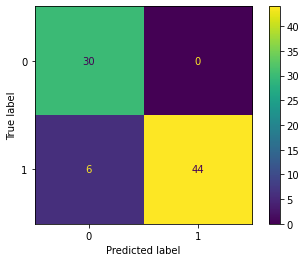

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#  Confusion Matrix
cm1 = confusion_matrix(y1_test,prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

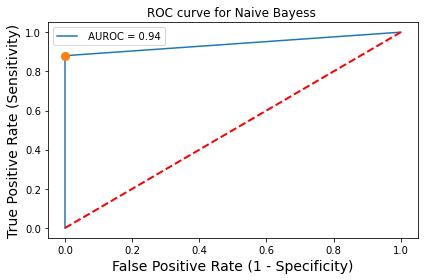

In [104]:
from sklearn.metrics import roc_curve, auc 

fig, (ax2) = plt.subplots(figsize = (6,4))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y1_test,prediction)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Naive Bayess ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# KNN: base method

In [105]:
# get the locations
X = data2.iloc[:, :-1]
Y = data2.iloc[:, -1]
 
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)
#With random_state=0 , we get the same train and test sets across different executions

In [106]:
X_train=X_train.join(Y_train)

In [107]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,sep='\n')


(280, 25)
(280,)
(120, 24)
(120,)


In [108]:
X_test['class']= Y_test

Text(0, 0.5, 'Erreur')

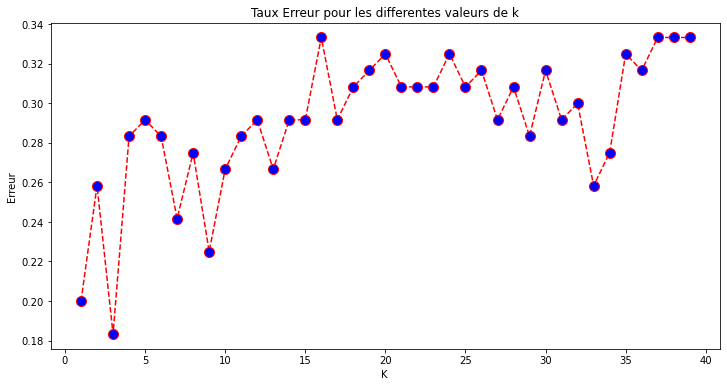

In [109]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, Y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [110]:
#def L1(X_train, Y_train, X_test):
    # Create KNN Classifier
    # metric='euclidean' 
knn = KNeighborsClassifier(n_neighbors=3, p=2)

    # Train the model using the training sets
knn.fit(X_train, Y_train)

    # Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array([1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0.])

In [111]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
CMDT=confusion_matrix(Y_test,y_pred)
CMDT=np.array(CMDT, dtype=int)
CMDT

array([[45,  3],
       [19, 53]])

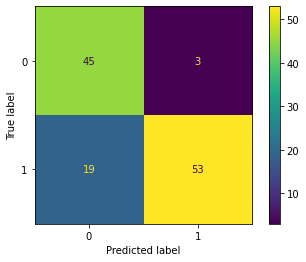

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

In [113]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80        48
         1.0       0.95      0.74      0.83        72

    accuracy                           0.82       120
   macro avg       0.82      0.84      0.82       120
weighted avg       0.85      0.82      0.82       120



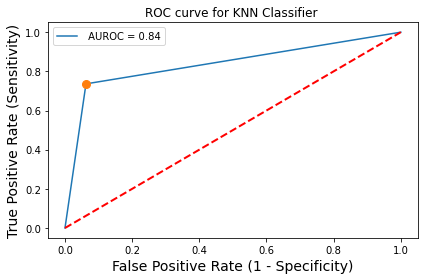

In [114]:
from sklearn.metrics import roc_curve, auc 

fig, (ax2) = plt.subplots(figsize = (6,4))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test,y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for KNN Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [115]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

In [116]:

accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(Y_test,y_pred)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(Y_test,y_pred)
print('Precision: %f' % precision)
recall = recall_score(Y_test,y_pred)
print('Recall: %f' % recall)
f1 = f1_score(Y_test,y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.816667
Balanced_Accuracy: 0.836806
Precision: 0.946429
Recall: 0.736111
F1 score: 0.828125


In [117]:
#Manhattan distance

In [118]:
# get the locations
X = data2.iloc[:, :-1]
Y = data2.iloc[:, -1]

# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)

In [119]:
X_train=X_train.join(Y_train)

In [120]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,sep='\n')


(280, 25)
(280,)
(120, 24)
(120,)


In [121]:
X_test['class']= Y_test

In [122]:
#def L1(X_train, Y_train, X_test):
    # Create KNN Classifier
    # metric='manhattan' 
knn = KNeighborsClassifier(n_neighbors=3, p=1)

    # Train the model using the training sets
knn.fit(X_train, Y_train)

    # Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred

array([1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0.])

In [123]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
CMDT=confusion_matrix(Y_test,y_pred)
CMDT=np.array(CMDT, dtype=int)
CMDT

array([[45,  3],
       [18, 54]])

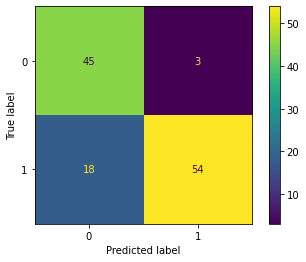

In [124]:
cm1 = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

In [125]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81        48
         1.0       0.95      0.75      0.84        72

    accuracy                           0.82       120
   macro avg       0.83      0.84      0.82       120
weighted avg       0.85      0.82      0.83       120



In [126]:
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(Y_test,y_pred)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(Y_test,y_pred)
print('Precision: %f' % precision)
recall = recall_score(Y_test,y_pred)
print('Recall: %f' % recall)
f1 = f1_score(Y_test,y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.825000
Balanced_Accuracy: 0.843750
Precision: 0.947368
Recall: 0.750000
F1 score: 0.837209


# SVM: base method

In [127]:
# get the locations
X = data2.iloc[:, :-1]
Y = data2.iloc[:, -1]
 
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)
#With random_state=0 , we get the same train and test sets across different executions

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn import svm

In [129]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [130]:
Y_pred = clf_svm.predict(x_test)

svm_acc = accuracy_score(y_test, Y_pred)
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        48
         1.0       0.97      0.94      0.96        72

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



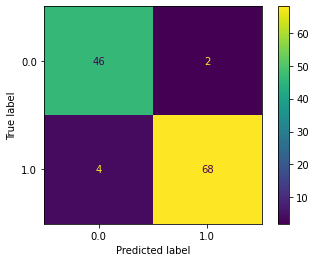

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_svm.classes_)
disp.plot()
plt.show()

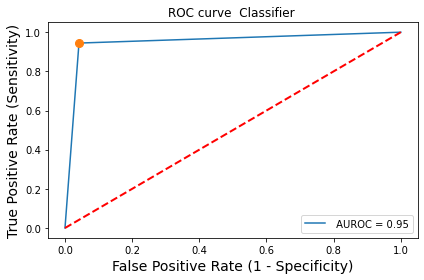

In [132]:
from sklearn.metrics import roc_curve, auc 

fig, (ax2) = plt.subplots(figsize = (6,4))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test, Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# 2 nd method Feature selection (CFS)

In [133]:
# split the dataset
X_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)

In [134]:
data2.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.136316,-0.160374,0.085918,0.186750,-0.014904,-0.102286,0.157401,0.042427,0.230731,...,-0.212796,0.093794,-0.203199,0.395073,0.354314,0.231419,-0.164399,0.103062,0.052938,0.227842
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,-0.150384,-0.156231,0.056808,0.110164,0.150180,...,-0.289237,0.022177,-0.219317,0.266901,0.219745,0.084135,-0.171262,0.053524,0.195134,0.293693
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,0.253894,0.365353,-0.306426,-0.231704,-0.299413,...,0.496434,-0.195068,0.432222,-0.323643,-0.340095,-0.135814,0.227343,-0.249867,-0.184155,-0.659504
al,0.085918,0.123518,-0.479962,1.000000,0.287751,-0.394844,-0.561713,0.417868,0.377935,0.293150,...,-0.473446,0.202920,-0.405092,0.406057,0.296441,0.200957,-0.297557,0.404683,0.229556,0.531562
su,0.186750,0.189561,-0.292053,0.287751,1.000000,-0.092940,-0.190062,0.168091,0.119399,0.627002,...,-0.181285,0.156649,-0.161994,0.254268,0.438887,0.229301,-0.066562,0.113452,0.042464,0.294555
rbc,-0.014904,-0.150384,0.253894,-0.394844,-0.092940,1.000000,0.377394,-0.102948,-0.184402,-0.138615,...,0.279875,0.003471,0.196534,-0.140538,-0.152232,-0.111493,0.157898,-0.195979,-0.107625,-0.282642
pc,-0.102286,-0.156231,0.365353,-0.561713,-0.190062,0.377394,1.000000,-0.520118,-0.330401,-0.247665,...,0.418435,-0.106733,0.381949,-0.291719,-0.196314,-0.172295,0.270768,-0.345413,-0.260566,-0.375154
pcc,0.157401,0.056808,-0.306426,0.417868,0.168091,-0.102948,-0.520118,1.000000,0.275082,0.195223,...,-0.296580,0.163215,-0.263810,0.195623,0.171573,0.188029,-0.186727,0.101665,0.175861,0.265313
ba,0.042427,0.110164,-0.231704,0.377935,0.119399,-0.184402,-0.330401,0.275082,1.000000,0.079162,...,-0.189420,0.104748,-0.192212,0.089046,0.084337,0.162395,-0.146972,0.132531,0.052208,0.186871
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,-0.138615,-0.247665,0.195223,0.079162,1.000000,...,-0.258200,0.119881,-0.214094,0.367816,0.503878,0.207020,-0.173369,0.091123,0.112449,0.379321


<AxesSubplot:>

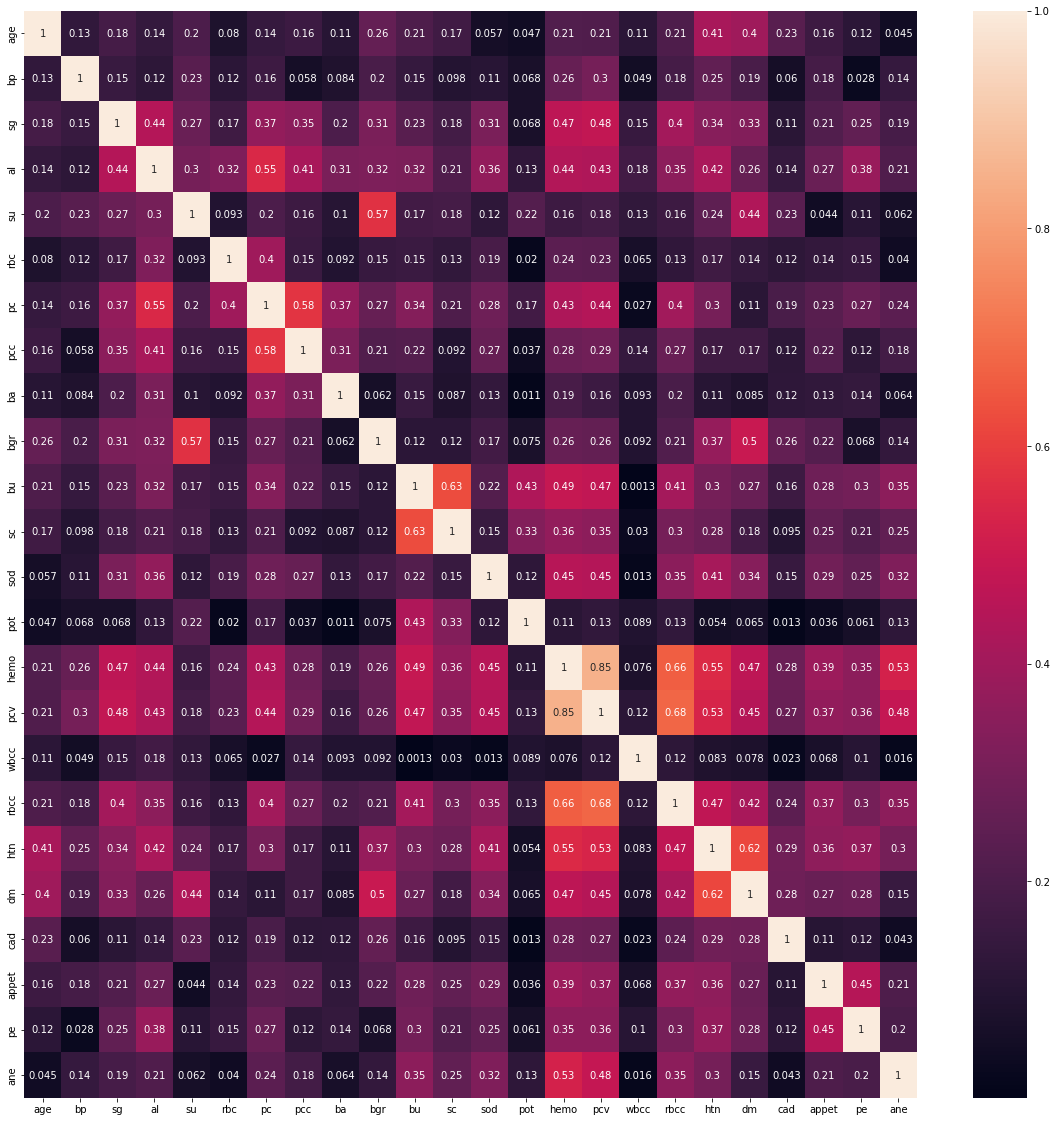

In [135]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(np.abs(corrmat),annot=True)

In [136]:
data2.corrwith(data2["class"]).sort_values(ascending=False)

class    1.000000
htn      0.590438
dm       0.549778
al       0.531562
bgr      0.379321
bu       0.369393
pe       0.365101
ane      0.325396
su       0.294555
bp       0.293693
sc       0.291245
pcc      0.265313
cad      0.236088
age      0.227842
ba       0.186871
wbcc     0.177571
pot      0.065218
rbc     -0.282642
sod     -0.334900
pc      -0.375154
appet   -0.383621
rbcc    -0.566163
sg      -0.659504
pcv     -0.673129
hemo    -0.726368
dtype: float64

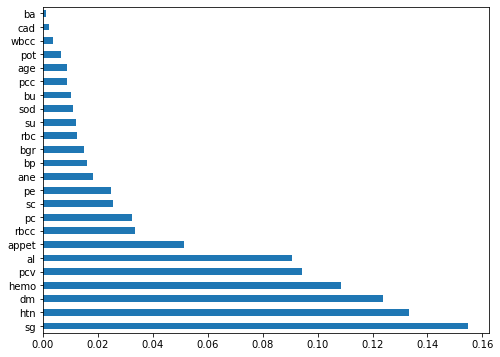

In [137]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()


In [138]:
#Geting the 17 importante features
imp_features=list(ranked_features.nlargest(17).index)
print(imp_features)

['sg', 'htn', 'dm', 'hemo', 'pcv', 'al', 'appet', 'rbcc', 'pc', 'sc', 'pe', 'ane', 'bp', 'bgr', 'rbc', 'su', 'sod']


# Naive bayes + CFS:

In [139]:
clf = BernoulliNB()  
acc=[]
prec=[]
rec=[]
fm=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,Y) :
  X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
  clf.fit(X1_train,y1_train.values.ravel())
  prediction=clf.predict(X1_test)
  accuracy=accuracy_score(y1_test,prediction)
  acc.append(accuracy)
  precision = precision_score(y1_test,prediction)
  prec.append(precision)
  recall = recall_score(y1_test,prediction)
  rec.append(recall)
  Fmeas = f1_score(y1_test,prediction)
  fm.append(Fmeas)

  acc2= np.mean(acc)
  prec2=np.mean(prec)
  rec2=np.mean(rec)
  fm2=np.mean(fm) 
print('Cross Validation accuracy: ' , (acc2))
print('Cross Validation precision: ' , (prec2))
print('Cross Validation recall: ' , (rec2))
print('Cross Validation F_measure: ' , (fm2))

Cross Validation accuracy:  0.9400000000000001
Cross Validation precision:  0.9954545454545455
Cross Validation recall:  0.908
Cross Validation F_measure:  0.9477182265556126


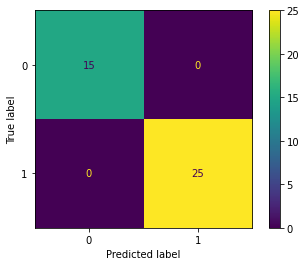

In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y1_test,prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

# KNN + CFS method

In [141]:
X=df[imp_features]
y=df['class']
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: float64

In [142]:
clf = KNeighborsClassifier(n_neighbors=3)
acc=[]
prec=[]
rec=[]
fm=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
#With random_state=None , we get different train and test sets across different executions 
#and the shuffling process is out of control.
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,Y) :
  X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
  clf.fit(X1_train,y1_train.values.ravel())
  prediction=clf.predict(X1_test)
  accuracy=accuracy_score(y1_test,prediction)
  acc.append(accuracy)
  precision = precision_score(y1_test,prediction)
  prec.append(precision)
  recall = recall_score(y1_test,prediction)
  rec.append(recall)
  Fmeas = f1_score(y1_test,prediction)
  fm.append(Fmeas)
  acc3= np.mean(acc)
  prec3=np.mean(prec)
  rec3=np.mean(rec)
  fm3=np.mean(fm)

 
print('Cross Validation accuracy: ' , (acc3))
print('Cross Validation precision: ' , (prec3))
print('Cross Validation recall: ' , (rec3))
print('Cross Validation F_measure: ' , (fm3))

Cross Validation accuracy:  0.99
Cross Validation precision:  0.9960000000000001
Cross Validation recall:  0.9879999999999999
Cross Validation F_measure:  0.9919183673469387


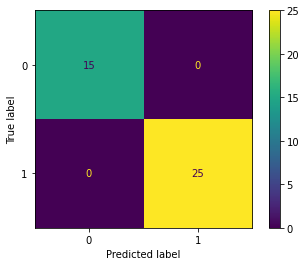

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y1_test,prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

# SVM + CFS method

In [144]:

clf = SVC(kernel="rbf")
acc=[]
prec=[]
rec=[]
fm=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,Y) :
  X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
  clf.fit(X1_train,y1_train.values.ravel())
  prediction=clf.predict(X1_test)
  accuracy=accuracy_score(y1_test,prediction)
  acc.append(accuracy)
  precision = precision_score(y1_test,prediction)
  prec.append(precision)
  recall = recall_score(y1_test,prediction)
  rec.append(recall)
  Fmeas = f1_score(y1_test,prediction)
  fm.append(Fmeas)
  fm.append(Fmeas)
  acc4= np.mean(acc)
  prec4=np.mean(prec)
  rec4=np.mean(rec)
  fm4=np.mean(fm)

 
print('Cross Validation accuracy: ' , (acc4))
print('Cross Validation precision: ' , (prec4))
print('Cross Validation recall: ' , (rec4))
print('Cross Validation F_measure: ' , (fm4))

Cross Validation accuracy:  0.9775
Cross Validation precision:  0.9956521739130434
Cross Validation recall:  0.968
Cross Validation F_measure:  0.9812925170068025


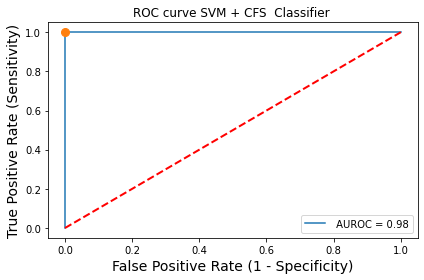

In [145]:
from sklearn.metrics import roc_curve, auc 

fig, (ax2) = plt.subplots(figsize = (6,4))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y1_test,prediction)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(np.mean(acc)))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve SVM + CFS  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

## 3rd Methode : AdaBoost + CFS 

In [146]:
X=df[imp_features]
y=df['class']

In [147]:
# Decision stump used as weak classifier
class DecisionStump():
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions


In [148]:
class Adaboost():

    def __init__(self, n_clf=5):
        self.n_clf = n_clf

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []
        # Iterate through classifiers
        for _ in range(self.n_clf):
            clf = DecisionStump()

            min_error = float('inf')
            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha performance of the stump
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
clf = Adaboost(n_clf=5)
clf.fit(X.to_numpy(),y.to_numpy())
y_boost=clf.predict(X.to_numpy())

In [150]:
y_boost=pd.DataFrame(y_boost)
y=y_boost.replace(-1.0,0.0)
y

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
395,1.0
396,0.0
397,1.0
398,1.0


In [151]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X,Y)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        70

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# KNN + CFS + ADABOOST

In [152]:

clf = KNeighborsClassifier(n_neighbors=5)
acc=[]
prec=[]
rec=[]
fm=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,Y) :
  X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
  clf.fit(X1_train,y1_train.values.ravel())
  prediction=clf.predict(X1_test)
  accuracy=accuracy_score(y1_test,prediction)
  acc.append(accuracy)
  precision = precision_score(y1_test,prediction)
  prec.append(precision)
  recall = recall_score(y1_test,prediction)
  rec.append(recall)
  Fmeas = f1_score(y1_test,prediction)
  fm.append(Fmeas)
  acc5= np.mean(acc)
  prec5=np.mean(prec)
  rec5=np.mean(rec)
  fm5=np.mean(fm)

 
print('Cross Validation accuracy: ' , (acc5))
print('Cross Validation precision: ' , (prec5))
print('Cross Validation recall: ' , (rec5))
print('Cross Validation F_measure: ' , (fm5))

Cross Validation accuracy:  0.9625
Cross Validation precision:  0.9763723237407447
Cross Validation recall:  0.9837593984962407
Cross Validation F_measure:  0.9794441385995881


# SVM + CFS + ADABOOST

In [153]:
clf = SVC(kernel="rbf")

acc=[]
prec=[]
rec=[]
fm=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,Y) :
  X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
  clf.fit(X1_train,y1_train.values.ravel())
  prediction=clf.predict(X1_test)
  accuracy=accuracy_score(y1_test,prediction)
  acc.append(accuracy)
  precision = precision_score(y1_test,prediction)
  prec.append(precision)
  recall = recall_score(y1_test,prediction)
  rec.append(recall)
  Fmeas = f1_score(y1_test,prediction)
  fm.append(Fmeas)

  acc6= np.mean(acc)
  prec6=np.mean(prec)
  rec6=np.mean(rec)
  fm6=np.mean(fm)

 
print('Cross Validation accuracy: ' , (acc6))
print('Cross Validation precision: ' , (prec6))
print('Cross Validation recall: ' , (rec6))
print('Cross Validation F_measure: ' , (fm6))

Cross Validation accuracy:  0.915
Cross Validation precision:  0.915
Cross Validation recall:  1.0
Cross Validation F_measure:  0.9553211700580121


In [154]:
models = pd.DataFrame({
    'Model' : [ 'naive bayes','naive bayes + cfs','knn',' knn + cfs','svm','svm + cfs','knn+cfs+adaboost','svm + cfs + adaboost'],
    'Accuracy' : [acc1, acc2,accuracy, acc3, svm_acc,acc4, acc6, acc6]})


models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
3,knn + cfs,0.9900
5,svm + cfs,0.9775
4,svm,0.9500
0,naive bayes,0.9400
1,naive bayes + cfs,0.9400
6,knn+cfs+adaboost,0.9150
7,svm + cfs + adaboost,0.9150
2,knn,0.8750
